In [1]:
import pandas as pd

pd.options.display.max_rows = 10
pd.options.display.max_columns = 1000

from sklearn import *
import numpy as np

from mlxtend.plotting import plot_confusion_matrix


/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/credit-default.csv")

In [3]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,repaid,furniture,1736,< 100 DM,4 - 7 yrs,3,female,none,4,real estate,31,none,own,1,1,1,none,yes,unskilled resident
996,< 0 DM,30,repaid,car (used),3857,< 100 DM,1 - 4 yrs,4,divorced male,none,4,building society savings,40,none,own,1,1,1,yes,yes,mangement self-employed
997,unknown,12,repaid,radio/tv,804,< 100 DM,> 7 yrs,4,single male,none,4,other,38,none,own,1,1,1,none,yes,skilled employee
998,< 0 DM,45,repaid,radio/tv,1845,< 100 DM,1 - 4 yrs,4,single male,none,4,unknown/none,23,none,for free,1,2,1,yes,yes,skilled employee


In [4]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

accuracy: 0.7333333333333333 
precision: 0.5576923076923077 
recall: 0.3372093023255814 
f1_score: 0.4202898550724638


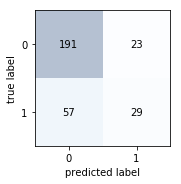

In [11]:
target = "default"
X = df.copy()
del X[target]

X = pd.get_dummies(X, drop_first=True)
columns = X.columns
y = np.where(df[target] == 2, 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype(np.float64)
                            , y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cf)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

In [12]:
est = pipe.steps[-1][-1]
est

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = X.columns, filled=True)
!dot -Tpng tree.dot -o tree.png
